## Data Project - Stock Market Analysis

In this project, we will be looking at data from the stock market, particularly some technology stocks. We will use pandas to get stock information, visualize different aspects of it, and finally look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predict future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time? <br>
2.) What was the daily return of the stock on average? <br>
3.) What was the moving average of the various stocks? <br>
4.) What was the correlation between different stocks' closing prices? <br>
4.) What was the correlation between different stocks' daily returns? <br>
5.) How much value do we put at risk by investing in a particular stock? <br>
6.) How can we attempt to predict future stock behavior? <br>

### Section 1 - Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Data imports
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#Imports for reading stock data
from pandas_datareader import DataReader
import scipy.stats as stats

#timestamps
from datetime import datetime

In [4]:
tech_stocks = ['AAPL','GOOGL','TSLA','AMZN'] #identify a list of stocks that we want to analyze
end_date = datetime.now() #set an end date for the analysis timeframe
start_date = datetime(end_date.year-1,end_date.month,end_date.day) #set a start date, one year prior to the end date

In [5]:
for stock in tech_stocks: #create a for loop to create a data frame for each stock in the tech_stocks list
    globals()[stock] = DataReader(stock, 'yahoo', start_date, end_date)
    #Each stock ticker is a global variable, stored as a data frame

In [6]:
TSLA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-18,384.779999,369.022003,379.798004,377.417999,82372500.0,377.417999
2020-08-19,382.200012,368.242004,373.000000,375.705994,61026500.0,375.705994
2020-08-20,404.398010,371.411987,372.135986,400.365997,103059000.0,400.365997
2020-08-21,419.097992,405.010010,408.951996,409.996002,107448000.0,409.996002
2020-08-24,425.799988,385.503998,425.256012,402.839996,100318000.0,402.839996
...,...,...,...,...,...,...
2021-08-11,715.179993,704.210022,712.710022,707.820007,9800600.0,707.820007
2021-08-12,722.799988,699.400024,706.340027,722.250000,17459100.0,722.250000
2021-08-13,729.900024,714.340027,723.710022,717.169983,16698900.0,717.169983


<AxesSubplot:xlabel='Date'>

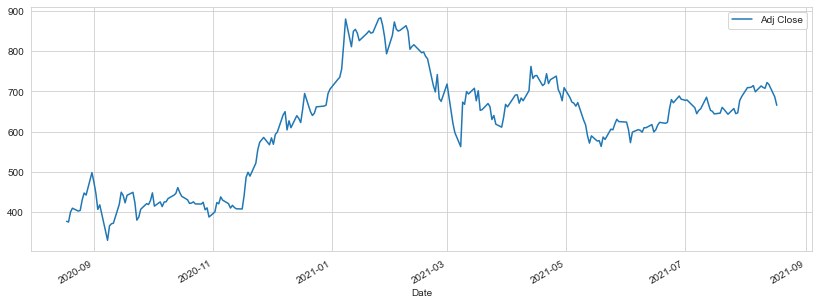

In [7]:
#plot data for a year's worth of Tesla's closing price:
TSLA['Adj Close'].plot(legend=True,figsize = (14,5))

<AxesSubplot:xlabel='Date'>

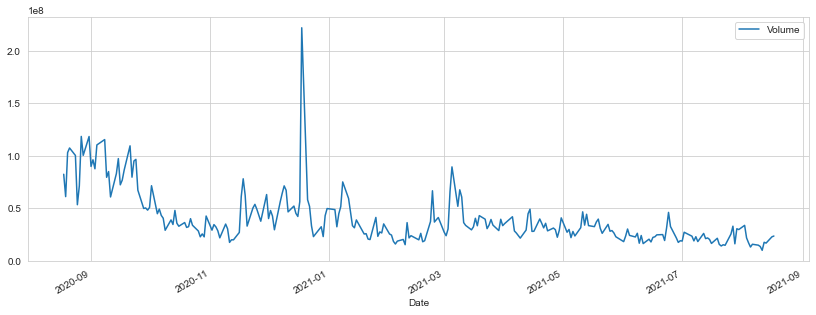

In [8]:
#plot data for the volume of stock traded over a year
TSLA['Volume'].plot(legend=True, figsize = (14,5))
#notice the scale for y-axis

### Section 2 - Moving Averages, Daily Returns, Kernel Density Estimate

In [9]:
#Calculate and plot moving averages (MA) over a period of days to smooth out the price trends

ma_days = [10,20,30,40,50] 
for days in ma_days:
    col = "MA for %s days" %(str(days)) #string literal to set column name
    
    TSLA[col] = TSLA['Adj Close'].rolling(days).mean() #create new entry in df with rolling mean as each column entry

<AxesSubplot:xlabel='Date'>

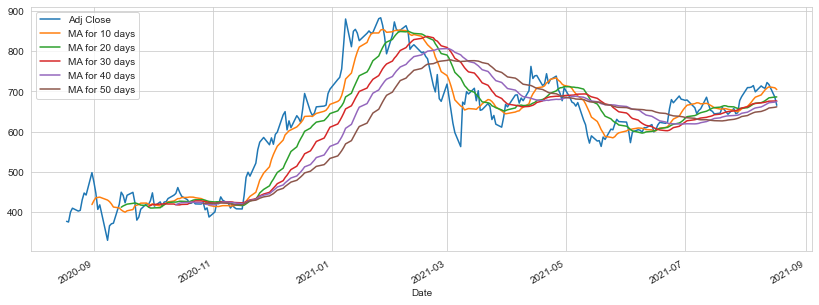

In [10]:
TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 40 days', 'MA for 50 days']].plot(
    subplots = False,figsize = (14,5)) 
#plot moving average with historical closing prices
#notice that higher the number of the moving day average, smoother the price trend becomes
#this will allow us to identify trend direction and determine support and resistance levels

<AxesSubplot:xlabel='Date'>

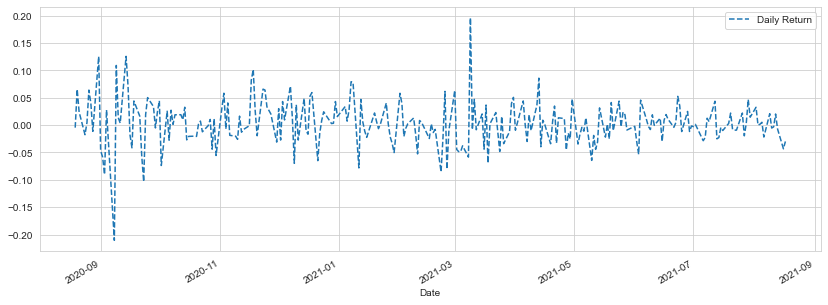

In [11]:
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change() 
#Remember that returns are calculated through percentage change in prices
TSLA['Daily Return'].plot(legend = True, figsize = (14,5), linestyle = '--')
#Plot the daily return on each day against the percentage

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

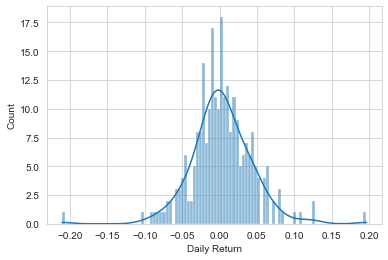

In [12]:
sns.histplot(TSLA['Daily Return'].dropna(), kde=True, bins=100) 
#plot a histogram of the daily returns along with a kernel density estimate (kde)
#the kde allows us to better analyze the probability distribution, as compared to a stand-alone histogram

### Section 3- Correlation on daily returns and closing prices

In [13]:
#until now, we were focused on just one stock in the stocks list
#let's create a dataframe to store information for all the stocks
closing_df = DataReader(tech_stocks,'yahoo',start_date,end_date)['Adj Close']

In [14]:
closing_df

Symbols,AAPL,GOOGL,TSLA,AMZN
Date,,,,
2020-08-18,114.823975,1555.780029,377.417999,3312.489990
2020-08-19,114.968048,1544.609985,375.705994,3260.479980
2020-08-20,117.519142,1576.250000,400.365997,3297.370117
2020-08-21,123.575188,1575.569946,409.996002,3284.719971
2020-08-24,125.053177,1585.150024,402.839996,3307.459961
...,...,...,...,...
2021-08-11,145.860001,2725.580078,707.820007,3292.110107
2021-08-12,148.889999,2743.879883,722.250000,3303.500000
2021-08-13,149.100006,2754.550049,717.169983,3293.969971


In [15]:
#Similarly, let's calculate the daily return for all the stocks in the df
stock_returns = closing_df.pct_change()

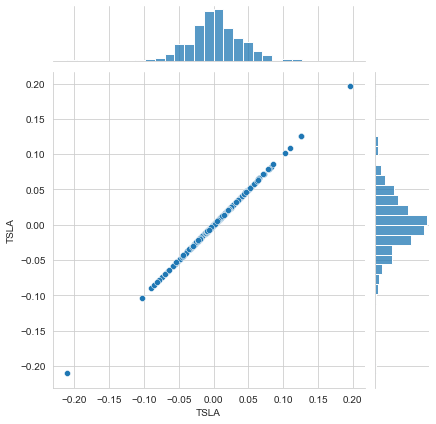

In [16]:
sns.jointplot(data=stock_returns,x='TSLA',y='TSLA',kind='scatter')

<li>the plot obtained makes sense</li>
<li>since the x and y values are same, we see a perfectly linear correlation between the data.</li>

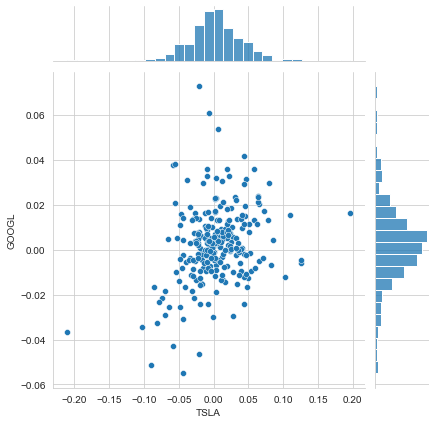

In [17]:
#check for correlation between two different stocks
sns.jointplot(data=stock_returns, x='TSLA', y='GOOGL')

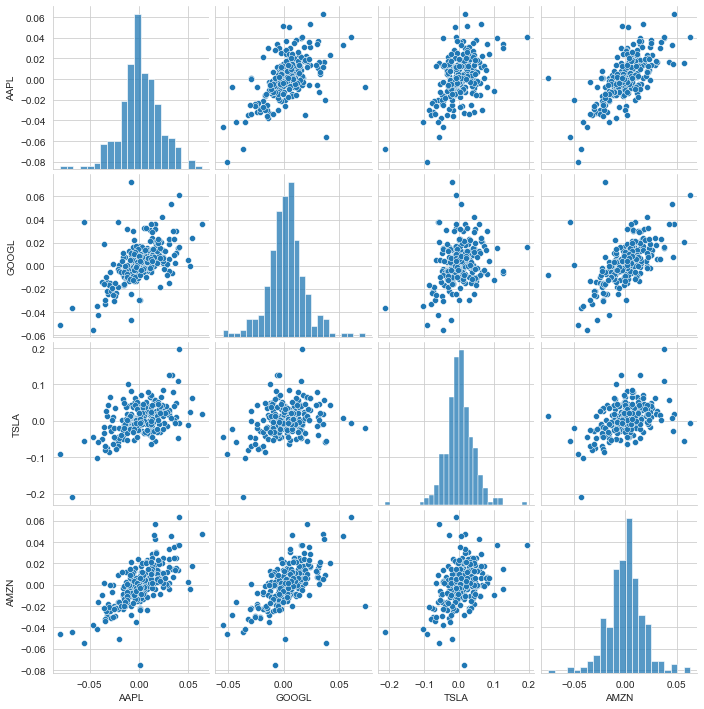

In [18]:
sns.pairplot(stock_returns.dropna())


<li>pairplot will give us the plots of all kinds of data we've plotted previously in this notebook </li>
<li>this includes a histogram plot and a scatterplot</li>
<li>read this like a 4x4 matrix to make the necessary relations</li>
<li>example: top right scatter plot is a plot for correlation between AAPL and AMZN </li>
<li>note: plot in row 2, column 3 is the correlation between TSLA and GOOGL, which we obtained above</li>
<li>note: the x and y values make a difference!</li>

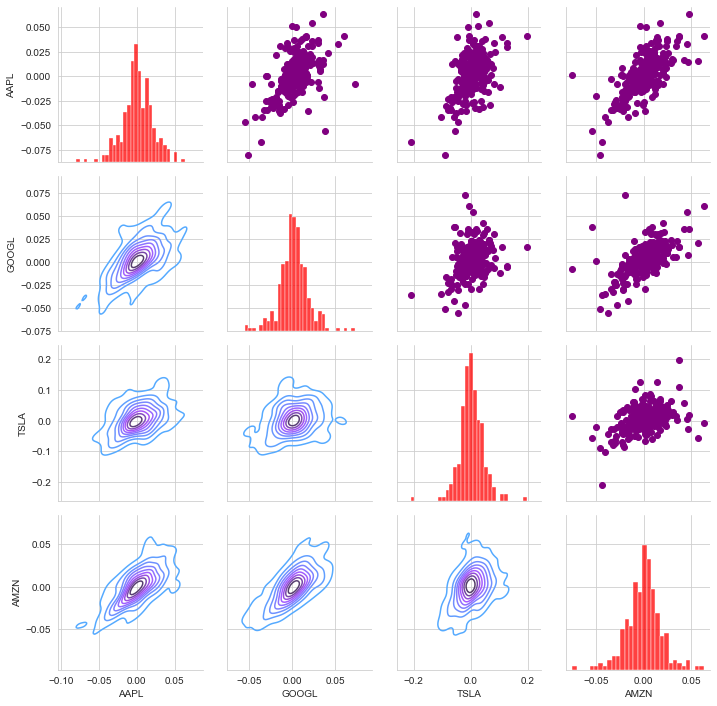

In [19]:
# to take control of all the plots in pairplot, we can use PairGrid

rets_fig = sns.PairGrid(stock_returns.dropna()) #create a pairgrid object with a non-null df

rets_fig.map_upper(plt.scatter, color = 'purple') #choose the kind of plot you want on the upper triangle
rets_fig.map_lower(sns.kdeplot, cmap='cool_d') #choose the kind of plot you want on the lower triangle
rets_fig.map_diag(sns.histplot, bins=30, color = 'red') #choose the kind of plot you want on the diagonal

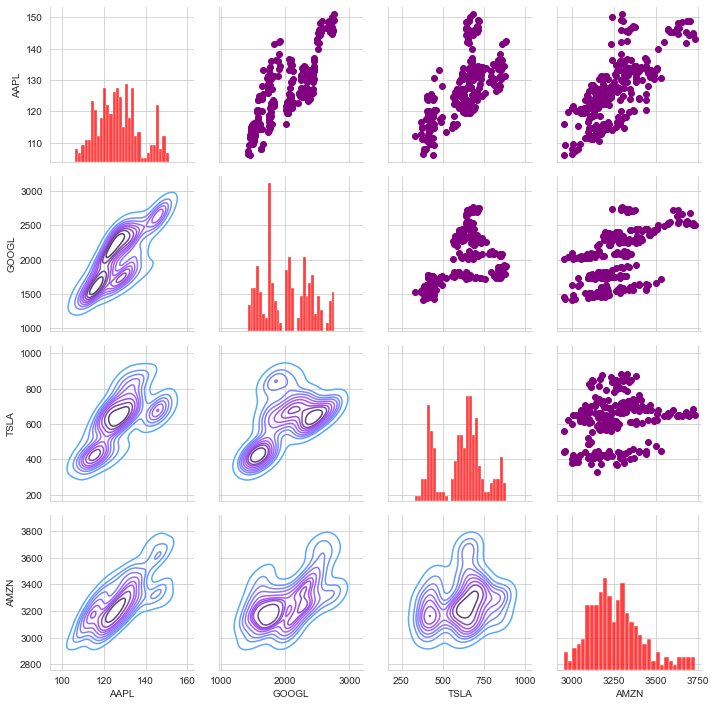

In [20]:
# we can also find a correlation between the closing prices
#we can just use our df now as closing_df

rets_fig = sns.PairGrid(closing_df.dropna()) #create a pairgrid object with a non-null df

rets_fig.map_upper(plt.scatter, color = 'purple') #choose the kind of plot you want on the upper triangle
rets_fig.map_lower(sns.kdeplot, cmap='cool_d') #choose the kind of plot you want on the lower triangle
rets_fig.map_diag(sns.histplot, bins=30, color = 'red') #choose the kind of plot you want on the diagonal

<b> Inference (for both, stock returns, and closing prices): </b> <br>
<li> There seems to be a fairly linear and positive correlation when x=AMZN and y = AAPL </li>
<li> Further, if we look at the kde plot when x=AAPL and y=AMZN, it also suggests a linear +ve correlation </li>
<li> A similar pattern is observed for (GOOGL,AMZN), (AAPL,TSLA), and (AAPL,GOOGL) </li>
<li> Positive correlations are much more prevalent in the closing prices pair grid, than the daily returns grid </li>

<li> Let's say we wanted actual numerical values of correlation, instead of the plots.</li>
<li> This would allow us to confirm our inference, and understand this concept in a much more <b>intuitive manner </li>

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

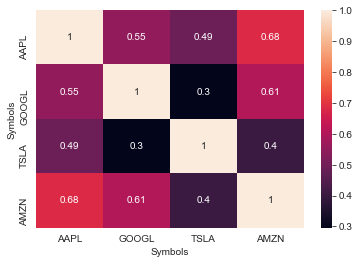

In [21]:
#for daily returns
sns.heatmap(stock_returns.corr(),annot=True)

<b> Evidently, we see a decent level of positive correlation based on the pairs identified in our inferences </b> <br> 
<li> Note that a correlation varies between 1 and -1, closer the value is to 1, the more linear (and positive) it is. Closer the value to -1, it is more linear (and negative). </li>
<li> Clearly, (AMZN,AAPL) have the highest correlation at 0.68, followed by (GOOGL,AMZN) at 0.61, (AAPL,GOOGL) at 0.55, and (AAPL,TSLA) at 0.49 </li>

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

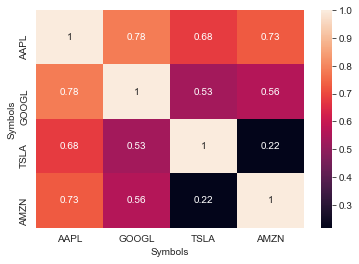

In [22]:
#for closing prices
sns.heatmap(closing_df.corr(),annot=True)

<b> Evidently, we see a decent level of positive correlation based on the pairs identified in our inferences </b> <br> 
<li> Clearly, (GOOGL,AAPL) have the highest correlation at 0.78, followed by (AMZN,AAPL) at 0.74, (AAPL,TSLA) at 0.69, and (GOOGL,AMZN) at 0.57 </li>

### Section 4- Risk Analysis

<li> Based on the information we have already gathered on daily percentage returns, we can analyze the risk of a stock using the standard deviation of the stock. Intuitively speaking, higher the standard deviation, higher the risk involved. This makes sense because a higher difference of daily return values from the mean would suggest increased volatility in the market, thereby inducing a higher risk of investment. </li>
<br>
<li> So, by comparing the standard deviation with the mean of the daily return (expected returns), we can identify the risk involved in investing in a stock. </li>

In [23]:
rets = stock_returns.dropna()

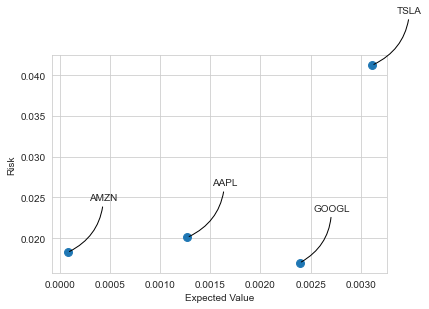

In [24]:
#we will use plt.scatter to plot the std deviation (risk) with the mean (expected returns)
area = np.pi*20 

#generate scatter plot
plt.scatter(rets.mean(),rets.std(),s=area)

#set x and y labels
plt.xlabel('Expected Value')
plt.ylabel('Risk')

#Label the scatter plots, add arrows, check out matplotlib documentation to learn more
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))

<li> Looking at the overall picture of the scatterplot, ideally, we would want to pick a stock with a higher expected value (mean), and lower risk (standard deviation). In our case, the Google stock seems to be the best choice. </li>
<br>
<li>And you really wouldn't want a negative expected return, so a daily percentage loss on your stock,with a high risk cuz that would mean you have a huge standard deviation. </li>
<br>
<li>Now, where it gets a little troublesome is if you have a very high expected return,
but also your risk is high. Then you're just playing the stock market there. </li>

### Section 5- Value at Risk

2 methods - Bootstrap and Monte Carlo

<h4> Bootstrap Method

In [25]:
rets.head()

Symbols,AAPL,GOOGL,TSLA,AMZN
Date,,,,
2020-08-19,0.001255,-0.007180,-0.004536,-0.015701
2020-08-20,0.022190,0.020484,0.065636,0.011314
2020-08-21,0.051532,-0.000431,0.024053,-0.003836
2020-08-24,0.011960,0.006080,-0.017454,0.006923
2020-08-25,-0.008204,0.013059,0.004538,0.011801


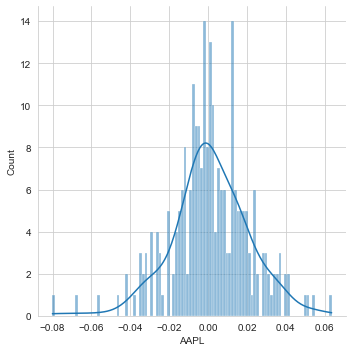

In [26]:
sns.displot(rets['AAPL'].dropna(), bins=100, kde=True)

In [27]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.03246292298239756

<b> Meaning: </b> The 0.05 empirical quantile of daily returns is at -0.0325. That means that with 95% confidence, our worst daily loss will not exceed 3.25%. If we have a 1 million dollar investment, our one-day 5% Value at Risk is 0.0325 * 1,000,000 = $32,500.

<li>rets.quantile(n)=q, where n is in [0,1], means that with (100-(n x 100))% confidence, our worst daily loss will not exceed (abs(q) x 100)%. </li>

<li> In simple terms, (100-(1-n))% of the times, our worst daily loss will not exceed (abs(q) x 100)% for that particular stock </li>

#### Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the <b>geometric Brownian motion (GBM)</b>, which is technically known as a <b>Markov process</b>. This means that the stock price follows a <b>random walk</b> and is consistent with (at the very least) the weak form of the <b>efficient market hypothesis (EMH)</b>: past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for <b>geometric Browninan motion</b> is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as <b>"drift"</b>, which is the average daily return multiplied by the change of time. The second term is known as <b>"shock"</b>, for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

#### Note: we will run the Monte Corle Simulation only on the Google Stock for this project

In [28]:
# Set up time horizon
days=365

# Set value for delta t
dt = 1/days

#get mu (mean value) and sigma (standard deviation)
mu = rets.mean()['GOOGL']
sigma = rets.std()['GOOGL']

In [30]:
def monte_carlo(start_price, days, sigma, mu): #note that we have already defined dt as 1/days
    ''' (float, int, float, float) -> array
    This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    #Initialize a price array
    price = np.zeros(days)
    price[0] = start_price
    
    #Initialize arrays for shock and drift values
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #Run price array for number of days:
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt)) 
        #center this array around the mean, set the scale as the std deviation times dt
        drift[x] = mu*dt #check the formula above
        price[x] = price[x-1] + (price[x-1]*(shock[x]+drift[x]))
        #This equation makes sense because the price of the current stock is equal to the value of the previous stock + the change (delta s)
        
    return price


Text(0.5, 1.0, 'Monte Carlo Simulation for the Google stock')

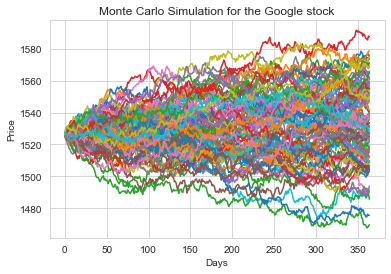

In [37]:
start_price = GOOGL['Open'][0]

for run in range(100):
    plt.plot(monte_carlo(start_price,days,sigma,mu))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for the Google stock')

In real life scenarios and projections, 100 simulations dont give us an accurate prediction. We would need at least a few thousands, or even more. So, let's try running 10,000 simulations!

In [38]:
runs = 10000

#Initialize an empty list to store price data for the Google stock
simulations = np.zeros(runs)

for i in range(runs):
    #Set the simulation data point as the last stock price for that run
    simulations[i] = monte_carlo(start_price, days, sigma, mu)[days-1]

Let's use the Quantile concept from the Bootstrap method to plot a histogram. We can do this because the above cell give us the array for our simulations.

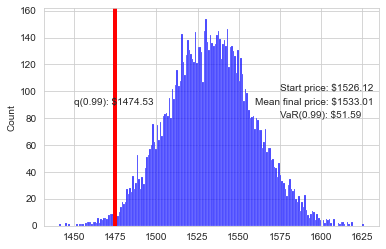

In [89]:
#Define the 1% quantile
q = np.percentile(simulations, 1)
#Plot the histogram
hist=sns.histplot(simulations, bins = 200, color = 'blue')

#Annotate text on the graph for clarity
hist.annotate("Start price: $%.2f"%start_price, (1575,100)) #start price
hist.annotate("Mean final price: $%.2f"%simulations.mean(), (1560,90)) #Mean final price
hist.annotate("VaR(0.99): $%.2f"%(start_price - q),(1575,80) ) #Variance within the 99% confidence interval

#Display the 1% Quantile
hist.annotate("q(0.99): $%.2f"%q, (1450,90))
hist.axvline(x=q, linewidth=4, color='r')

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be USD 51.59 for every investment of USD 1526.12(the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $51.59 at risk 99% of the time from our Monte Carlo Simulation.